# Cabal Stats

## Imports

In [291]:
import csv
import os
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
import string, timeit
from collections import defaultdict
import operator
import gensim
from sklearn.decomposition import TruncatedSVD
from collections import Counter
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import plotly_express as px
import plotly_express.colors.colorbrewer as pxc

%matplotlib inline
%config InLineBackend.figure_format = 'retina'

sns.set_style('whitegrid')


## Find the path and the file and create an absolute link to it

In [35]:
#Get the directory, the filename and combine the two
directory = r'C:\Users\Corey Moser\Documents\Programming\Python\My_Projects\CabalStats'+'\\'
the_chat = "CabalChat_091318.txt"
full_path = directory+the_chat

In [36]:
# Print each line out with a line numbering 

with open(full_path, encoding='utf-8', mode ='r') as f:
    for cnt, line in enumerate(f):
        print("Line {}: {}".format(cnt,line))

Line 0: 8/12/18, 4:12 PM - Matt Margolis: Wow

Line 1: 8/12/18, 4:18 PM - Corey Moser: Where is that levs? And why aren't you burning it down?

Line 2: 8/12/18, 4:32 PM - Mike Levy: Denver. I know it’s a travesty

Line 3: 8/12/18, 4:39 PM - Eric Shalem: Was it good?

Line 4: 8/12/18, 5:34 PM - Mike Levy: Just drove by I wouldn’t patronize that place

Line 5: 8/12/18, 5:46 PM - Andrew Hyman: Good man

Line 6: 8/12/18, 5:52 PM - Shiva Patolla: There is only on true king

Line 7: 8/12/18, 5:52 PM - Shiva Patolla: *one

Line 8: 8/12/18, 5:58 PM - Eric Shalem: How do you know they didn’t just expand

Line 9: 8/12/18, 5:58 PM - Andrew Hyman: Different branding

Line 10: 8/12/18, 6:21 PM - Andrew Hyman: IMG-20180812-WA0001.jpg (file attached)

Line 11: 8/12/18, 8:36 PM - Shiva Patolla: IMG-20180812-WA0002.jpg (file attached)

Line 12: 8/12/18, 8:37 PM - Matt Margolis: Lol aw

Line 13: 8/12/18, 9:07 PM - Matt Margolis: @16782660542 I’m watching Out of Time

Line 14: 8/12/18, 9:07 PM - Matt Mar


Line 1482: 8/27/18, 7:22 PM - Ron Johnson: Maybe the other way around

Line 1483: 8/27/18, 7:23 PM - Matt Margolis: Floundeeeeeh

Line 1484: 8/27/18, 7:23 PM - Eric Shalem: The girls all watched and bated in the corner while he had sex with flounder?

Line 1485: 8/27/18, 7:24 PM - Matt Margolis: :|

Line 1486: 8/27/18, 7:25 PM - Matt Margolis: That one missed

Line 1487: 8/27/18, 7:25 PM - Eric Shalem: Bummer

Line 1488: 8/27/18, 7:25 PM - Eric Shalem: I smiled while writing it

Line 1489: 8/27/18, 7:25 PM - Matt Margolis: That’s all that matters I guess

Line 1490: 8/27/18, 7:26 PM - Eric Shalem: It’s not

Line 1491: 8/27/18, 7:26 PM - Eric Shalem: What other people think of you is much more important than what you think of yourself

Line 1492: 8/27/18, 7:26 PM - Ron Johnson: Lem lets get chick fil a for dinner on wed?

Line 1493: 8/27/18, 7:26 PM - Matt Margolis: Weds is the draft

Line 1494: 8/27/18, 7:26 PM - Eric Shalem: It’s not near my apartment

Line 1495: 8/27/18, 7:26 PM - M

Line 2981: 9/7/18, 3:22 PM - Matt Margolis: That pic is nice you guys are cute

Line 2982: 9/7/18, 3:22 PM - Matt Margolis: It must be great being in love

Line 2983: 9/7/18, 3:32 PM - Amir Yimer: You’re in love...

Line 2984: 9/7/18, 3:32 PM - Matt Margolis: Being in requited love*

Line 2985: 9/7/18, 3:32 PM - Eric Shalem: Hyman don’t forget to set your lineup

Line 2986: 9/7/18, 3:57 PM - Matt Margolis: Ugh the private bathroom has been occupied all day I can’t do my work squanch

Line 2987: 9/7/18, 3:58 PM - Amir Yimer: Is this a thing you do?

Line 2988: 9/7/18, 4:01 PM - Corey Moser: VID-20180907-WA0007.mp4 (file attached)

Line 2989: 9/7/18, 4:02 PM - Amir Yimer: Should have posted this after Eric called you a deviant

Line 2990: 9/7/18, 4:04 PM - Corey Moser: Eric called me a deviant?

Line 2991: 9/7/18, 4:09 PM - Eric Shalem: Did a cabal search. Never used the word deviant on this chat in 6 years

Line 2992: 9/7/18, 4:10 PM - Amir Yimer: He said it with his body language

Line

In [41]:
def opn(file_name):
    '''
    Transforms a text file to a list where each chat post is another item in the list.
    input: str. path to the chapter file
    output: a list containing each line of the text as a list
    '''
    with open(file_name, encoding='utf-8', mode ='r') as file:
        l = []
        for line in file:
            l.append(line.rstrip('\n'))
    return l

In [42]:
opn(full_path)

['8/12/18, 4:12 PM - Matt Margolis: Wow',
 "8/12/18, 4:18 PM - Corey Moser: Where is that levs? And why aren't you burning it down?",
 '8/12/18, 4:32 PM - Mike Levy: Denver. I know it’s a travesty',
 '8/12/18, 4:39 PM - Eric Shalem: Was it good?',
 '8/12/18, 5:34 PM - Mike Levy: Just drove by I wouldn’t patronize that place',
 '8/12/18, 5:46 PM - Andrew Hyman: Good man',
 '8/12/18, 5:52 PM - Shiva Patolla: There is only on true king',
 '8/12/18, 5:52 PM - Shiva Patolla: *one',
 '8/12/18, 5:58 PM - Eric Shalem: How do you know they didn’t just expand',
 '8/12/18, 5:58 PM - Andrew Hyman: Different branding',
 '8/12/18, 6:21 PM - Andrew Hyman: IMG-20180812-WA0001.jpg (file attached)',
 '8/12/18, 8:36 PM - Shiva Patolla: IMG-20180812-WA0002.jpg (file attached)',
 '8/12/18, 8:37 PM - Matt Margolis: Lol aw',
 '8/12/18, 9:07 PM - Matt Margolis: @16782660542 I’m watching Out of Time',
 '8/12/18, 9:07 PM - Matt Margolis: Dean Cain is so menacing',
 '8/12/18, 9:08 PM - Eric Shalem: That movie co

In [158]:
def transform_to_data(file_name):
    '''
    Generates a list of ordered tuples (date, time, user name, message/post content).
    Input: A file name
    Output: A list of ordered tuples e.g. [(date, time, user, message),
                                            (date, time, user, message)]
    '''
    
    date_lst = []
    time_lst = []
    user_lst = []
    message_lst =[]

    comma_partition, dash_partition, colon_partition  = ",", "-", ":"
    
#     text_file_as_list = opn(file_name)
    for i in opn(file_name):
        date, comma, rest_of_message = i.partition(comma_partition)
        date_lst.append(date.strip())

        time, dash, rest_of_message = rest_of_message.partition(dash_partition)
        time_lst.append(time.strip())

        name, colon, post_content = rest_of_message.partition(colon_partition)
        user_lst.append(name.strip())
        message_lst.append(post_content.strip())
    
    return list(zip(date_lst, time_lst, user_lst, message_lst))

    

In [226]:
df = pd.DataFrame() #Initialize a dataframe

#Append each row to our data df
append_me = pd.DataFrame(data = transform_to_data(full_path), columns = ['Date', 'Time', 'User', 'Message'])
df = df.append(append_me, ignore_index=True)

In [227]:
df.head()

,Date,Time,User,Message
0,8/12/18,4:12 PM,Matt Margolis,Wow
1,8/12/18,4:18 PM,Corey Moser,Where is that levs? And why aren't you burning...
2,8/12/18,4:32 PM,Mike Levy,Denver. I know it’s a travesty
3,8/12/18,4:39 PM,Eric Shalem,Was it good?
4,8/12/18,5:34 PM,Mike Levy,Just drove by I wouldn’t patronize that place


In [185]:
#Save it to a .csv as a backup point
df.to_csv('CabalStats_091318_2.csv', index=False)

## User Cleanup

<b>Hadrian's user name is his phone number. Change to "Hadrian"</b>

In [228]:
user_list = [df['User'].unique()]
user_list

[array(['Matt Margolis', 'Corey Moser', 'Mike Levy', 'Eric Shalem',
        'Andrew Hyman', 'Shiva Patolla', 'Ron Johnson',
        '\u202a+1 (703) 635-0860\u202c', 'Amir Yimer', '',
        'Tyler O Connor', 'Jordan Elman', 'Jon Zuckerbrod', 'Brandon Cho',
        'Matt Schackett', "Ron Johnson changed this group's icon"],
       dtype=object)]

In [229]:
df["User"]= data["User"].replace("\u202a+1 (703) 635-0860\u202c", "Hadrian") 

In [230]:
user_list = [df['User'].unique()]
user_list

[array(['Matt Margolis', 'Corey Moser', 'Mike Levy', 'Eric Shalem',
        'Andrew Hyman', 'Shiva Patolla', 'Ron Johnson', 'Hadrian',
        'Amir Yimer', '', 'Tyler O Connor', 'Jordan Elman',
        'Jon Zuckerbrod', 'Brandon Cho', 'Matt Schackett',
        "Ron Johnson changed this group's icon"], dtype=object)]

<b>Ron changed the group icon was counted as a user. Will drop this row</b>

In [234]:
df[df['User'] == "Ron Johnson changed this group's icon"]

,Date,Time,User,Message
3015,9/7/18,8:56 PM,Ron Johnson changed this group's icon,


In [239]:
user_list = [df['User'].unique()]
user_list

[array(['Matt Margolis', 'Corey Moser', 'Mike Levy', 'Eric Shalem',
        'Andrew Hyman', 'Shiva Patolla', 'Ron Johnson', 'Hadrian',
        'Amir Yimer', '', 'Tyler O Connor', 'Jordan Elman',
        'Jon Zuckerbrod', 'Brandon Cho', 'Matt Schackett'], dtype=object)]

<b>#61 messages were recorded without a user</b>

In [231]:
df[df['User'] == ""].head(n=15)

,Date,Time,User,Message
72,I learned a new word tonight,,,
266,This is pretty cool,,,
361,Except for you,,,
370,It has never been said by anyone but you in th...,,,
506,This is neat,,,
555,Became biggest cluster duck,,,
557,Got the last one,,,
691,1.,,,
692,busy movement and activity.,,,
693,"""the hustle and bustle of the big cities""",,,


In [232]:
#Picked one at random. Would probably need to do more file pre-processing
df.iloc[72,:]

Date       I learned a new word tonight
Time                                   
User                                   
Message                                
Name: 72, dtype: object

In [248]:
#For now, changing to "User Unknown"
df["User"]= df["User"].replace("", "User Unknown") 

## Most/least frequent poster

In [249]:
most_posts = df['User'].value_counts()
most_posts

Eric Shalem       691
Matt Margolis     605
Amir Yimer        527
Ron Johnson       435
Corey Moser       271
Tyler O Connor    199
Andrew Hyman      188
Mike Levy         180
Hadrian            87
User Unknown       61
Jon Zuckerbrod     54
Shiva Patolla      44
Jordan Elman       43
Brandon Cho         6
Matt Schackett      4
Name: User, dtype: int64

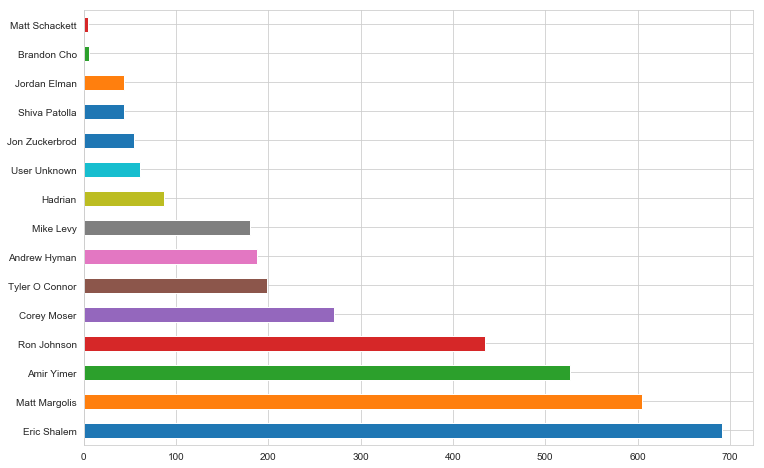

In [258]:
most_posts.plot(kind='barh', figsize=(12,8))

In [279]:
df_most_posts = most_posts.reset_index().rename(columns={'index':'User', 'User':'Num_Msg'})

In [280]:
df_most_posts.head()

,User,Num_Msg
0,Eric Shalem,691
1,Matt Margolis,605
2,Amir Yimer,527
3,Ron Johnson,435
4,Corey Moser,271


In [329]:
px.bar(df_most_posts, x='Num_Msg', y='User', 
       orientation='h',
       title = 'Most/Least Posts',
       hover_name='Num_Msg',
       text='Num_Msg',
       color_discrete_sequence= pxc.Pastel2,
#       color = 'Num_Msg'
      )

In [336]:
most_posts_freq = df['User'].value_counts(normalize=True)
most_posts_freq.reset_index().head(n=5).rename(columns={'index':'User','User':'Pct_Total'})

,User,Pct_Total
0,Eric Shalem,0.203535
1,Matt Margolis,0.178203
2,Amir Yimer,0.155228
3,Ron Johnson,0.128130
4,Corey Moser,0.079823


## Length of messages

In [348]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
punct = set(string.punctuation)

#Free of punctiations dialogue
df['free_message']= df['Message'].apply(lambda x :''.join(ch.lower() for ch in x if ch not in punct))

[nltk_data] Downloading package punkt to C:\Users\Corey
[nltk_data]     Moser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Corey
[nltk_data]     Moser\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [350]:
df.head(n=5)

,Date,Time,User,Message,free_message
0,8/12/18,4:12 PM,Matt Margolis,Wow,wow
1,8/12/18,4:18 PM,Corey Moser,Where is that levs? And why aren't you burning...,where is that levs and why arent you burning i...
2,8/12/18,4:32 PM,Mike Levy,Denver. I know it’s a travesty,denver i know it’s a travesty
3,8/12/18,4:39 PM,Eric Shalem,Was it good?,was it good
4,8/12/18,5:34 PM,Mike Levy,Just drove by I wouldn’t patronize that place,just drove by i wouldn’t patronize that place


In [351]:
#We create a tokenize variable of the free dialogue column to separate the words and count them
df['tokenized_sents'] = df.apply(lambda row: nltk.word_tokenize(row['free_message']), axis=1)

In [352]:
df.head(n=5)

,Date,Time,User,Message,free_message,tokenized_sents
0,8/12/18,4:12 PM,Matt Margolis,Wow,wow,[wow]
1,8/12/18,4:18 PM,Corey Moser,Where is that levs? And why aren't you burning...,where is that levs and why arent you burning i...,"[where, is, that, levs, and, why, arent, you, ..."
2,8/12/18,4:32 PM,Mike Levy,Denver. I know it’s a travesty,denver i know it’s a travesty,"[denver, i, know, it, ’, s, a, travesty]"
3,8/12/18,4:39 PM,Eric Shalem,Was it good?,was it good,"[was, it, good]"
4,8/12/18,5:34 PM,Mike Levy,Just drove by I wouldn’t patronize that place,just drove by i wouldn’t patronize that place,"[just, drove, by, i, wouldn, ’, t, patronize, ..."


In [353]:
#Get number of words per dialogue
df['number_of_words'] = df.tokenized_sents.apply(lambda x: len(x))

In [354]:
df.head(n=5)

,Date,Time,User,Message,free_message,tokenized_sents,number_of_words
0,8/12/18,4:12 PM,Matt Margolis,Wow,wow,[wow],1
1,8/12/18,4:18 PM,Corey Moser,Where is that levs? And why aren't you burning...,where is that levs and why arent you burning i...,"[where, is, that, levs, and, why, arent, you, ...",11
2,8/12/18,4:32 PM,Mike Levy,Denver. I know it’s a travesty,denver i know it’s a travesty,"[denver, i, know, it, ’, s, a, travesty]",8
3,8/12/18,4:39 PM,Eric Shalem,Was it good?,was it good,"[was, it, good]",3
4,8/12/18,5:34 PM,Mike Levy,Just drove by I wouldn’t patronize that place,just drove by i wouldn’t patronize that place,"[just, drove, by, i, wouldn, ’, t, patronize, ...",10


In [362]:
num_words_df = df.groupby('User')['number_of_words'].sum().sort_values(ascending=False).reset_index()
num_words_df.head()

,User,number_of_words
0,Eric Shalem,4948
1,Matt Margolis,4761
2,Amir Yimer,3607
3,Ron Johnson,2906
4,Corey Moser,1809


Merge this with our previous df

In [379]:
df_merge = pd.merge(df_most_posts,num_words_df)
df_merge.head()

,User,Num_Msg,number_of_words
0,Eric Shalem,691,4948
1,Matt Margolis,605,4761
2,Amir Yimer,527,3607
3,Ron Johnson,435,2906
4,Corey Moser,271,1809


In [381]:
df_merge['words_per_msg'] = df_merge['number_of_words']/df_merge['Num_Msg']
df_merge

,User,Num_Msg,number_of_words,words_per_msg
0,Eric Shalem,691,4948,7.160637
1,Matt Margolis,605,4761,7.869421
2,Amir Yimer,527,3607,6.844402
3,Ron Johnson,435,2906,6.680460
4,Corey Moser,271,1809,6.675277
5,Tyler O Connor,199,1657,8.326633
6,Andrew Hyman,188,1023,5.441489
7,Mike Levy,180,1374,7.633333
8,Hadrian,87,697,8.011494
9,User Unknown,61,0,0.000000


In [382]:
df[df['User'] == 'Matt Schackett']

,Date,Time,User,Message,free_message,tokenized_sents,number_of_words
548,8/17/18,11:28 AM,Matt Schackett,"Damn. He wasn’t really on my radar, a little t...",damn he wasn’t really on my radar a little too...,"[damn, he, wasn, ’, t, really, on, my, radar, ...",20
2012,8/31/18,8:22 PM,Matt Schackett,IMG-20180831-WA0003.jpg (file attached),img20180831wa0003jpg file attached,"[img20180831wa0003jpg, file, attached]",3
2602,9/6/18,5:58 PM,Matt Schackett,I’m back! And I forgot to vote.,i’m back and i forgot to vote,"[i, ’, m, back, and, i, forgot, to, vote]",9
2603,9/6/18,6:00 PM,Matt Schackett,And I looked at AC hotels and then forgot abou...,and i looked at ac hotels and then forgot abou...,"[and, i, looked, at, ac, hotels, and, then, fo...",25


In [384]:
#Out of curioisity I wanted to see Matt's longest message
df.iloc[2603]['Message']

'And I looked at AC hotels and then forgot about it until someone brought it up today. Everyone going? Then yeah, I’m down.'

In [405]:
px.scatter(df_merge, x='Num_Msg', y='number_of_words',
          color='User', trendline='ols', size='words_per_msg', text='User',
          title = 'Number of Message Sent v. Total Number of Words',
          labels ={'number_of_words': 'Total Words', "Num_Msg":'Total Messages Sent'})

In [415]:
df_merge['avg_words_per_msg_rounded'] = round(df_merge['words_per_msg'],3)
df_merge.sort('avg_words_per_msg_rounded')

AttributeError: 'DataFrame' object has no attribute 'sort'

In [426]:
px.bar(df_merge, x='User', y='avg_words_per_msg_rounded', 
       orientation='v',
       title = 'Average Message Length',
       text='words_per_msg',
       color='User',
       labels ={'avg_words_per_msg_rounded': 'Average Words per Message ', "User":'Cabalsmen'}
      )

## Bag of words code

In [ ]:
# filepath = 'Cabal_2018_0318.txt'

#Print each line out with a line numbering 

# with open(filepath, encoding='utf-8', mode ='r') as f:
#     for cnt, line in enumerate(f):
#         print("Line {}: {}".format(cnt,line))


#Make a bag of words
def ordered_bag_of_words(bag_of_words, desc=False):
    words = [(word, cnt) for word, cnt in bag_of_words.items()]
    return sorted(words, key=lambda x: x[1], reverse = desc)
        
#Record the word count
def record_word_cnt(words, bag_of_words):
    for word in words:
        if word != '':
            if word.lower() in bag_of_words:
                bag_of_words[word.lower()] +=1
            else:
                bag_of_words[word.lower()] =1

bag_of_words = {}
with open(filepath, encoding='utf-8') as fp:
    cnt = 0
    for line in fp:
#         print("line {} content {}". format(cnt,line))
        record_word_cnt(line.strip().split(' '), bag_of_words)
        cnt +=1
sorted_words = ordered_bag_of_words(bag_of_words, desc=True)
for word in sorted_words[:100]:
    print(word)
# print("Most frequent 10 words {}\\n".format(sorted_words[:100]),)

## Date Time Stuff

In [331]:
df.head()

,Date,Time,User,Message
0,8/12/18,4:12 PM,Matt Margolis,Wow
1,8/12/18,4:18 PM,Corey Moser,Where is that levs? And why aren't you burning...
2,8/12/18,4:32 PM,Mike Levy,Denver. I know it’s a travesty
3,8/12/18,4:39 PM,Eric Shalem,Was it good?
4,8/12/18,5:34 PM,Mike Levy,Just drove by I wouldn’t patronize that place
